In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd Downloads

C:\Users\shashank s\Downloads


# Building LSTM Model for predicting the CashFlow

In [4]:
training_data = dataset_training.iloc[:,8:9].values
training_data

array([[2163480],
       [3362496],
       [3247884],
       [5631955],
       [5501340],
       [3422760],
       [3197472],
       [2127160],
       [2002725],
       [3178320],
       [3612544],
       [6432810],
       [6529644],
       [3218600],
       [3544424],
       [2319120],
       [1954375],
       [3194148],
       [3043008],
       [5560656],
       [6718909],
       [3522420],
       [3013368],
       [2304960],
       [2219730],
       [3378744],
       [3338240],
       [6645672],
       [6102040],
       [3540384],
       [3579144],
       [2105850],
       [1901900],
       [3578960],
       [3259944],
       [6552106],
       [6044314],
       [2903940],
       [3150448],
       [2050620],
       [2181750],
       [3192752],
       [3547648],
       [6385316],
       [6519741],
       [3389776],
       [3610152],
       [2230770],
       [2018695],
       [3150448],
       [2977376],
       [6867212],
       [6485248],
       [3236112],
       [3314024],
       [21

In [5]:
training_data.shape

(571, 1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

training_data_scaled 

array([[0.0671429 ],
       [0.29287589],
       [0.27129844],
       [0.72013606],
       [0.6955458 ],
       [0.30422151],
       [0.26180762],
       [0.06030511],
       [0.03687833],
       [0.25820196],
       [0.33995123],
       [0.87090919],
       [0.88913966],
       [0.26578528],
       [0.32712661],
       [0.0964445 ],
       [0.02777571],
       [0.26118182],
       [0.23272742],
       [0.70671293],
       [0.92477167],
       [0.32298402],
       [0.22714724],
       [0.09377866],
       [0.07773282],
       [0.29593483],
       [0.28830933],
       [0.91098369],
       [0.8086367 ],
       [0.32636601],
       [0.33366317],
       [0.05629318],
       [0.01789649],
       [0.33362853],
       [0.27356892],
       [0.89336847],
       [0.79776891],
       [0.20654576],
       [0.25295463],
       [0.04589529],
       [0.07058251],
       [0.26091901],
       [0.32773357],
       [0.86196772],
       [0.88727527],
       [0.29801177],
       [0.3395009 ],
       [0.079

In [7]:
X_train = []
y_train = []
for i in range(60, 350):
    X_train.append(training_data_scaled[i-60:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.0671429 ],
        [0.29287589],
        [0.27129844],
        ...,
        [0.30265364],
        [0.24578098],
        [0.86468401]],

       [[0.29287589],
        [0.27129844],
        [0.72013606],
        ...,
        [0.24578098],
        [0.86468401],
        [0.89403211]],

       [[0.27129844],
        [0.72013606],
        [0.6955458 ],
        ...,
        [0.86468401],
        [0.89403211],
        [0.25897008]],

       ...,

       [[0.05445383],
        [0.0679788 ],
        [0.34982235],
        ...,
        [0.04720562],
        [0.31430349],
        [0.27200557]],

       [[0.0679788 ],
        [0.34982235],
        [0.24158643],
        ...,
        [0.31430349],
        [0.27200557],
        [0.81356172]],

       [[0.34982235],
        [0.24158643],
        [0.79968563],
        ...,
        [0.27200557],
        [0.81356172],
        [0.80193635]]])

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
model = Sequential()

In [11]:
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100))


# Adding the output layer
model.add(Dense(units = 1))

In [12]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
10/10 [==============================] - 15s 206ms/step - loss: 0.1258
Epoch 2/100
10/10 [==============================] - 2s 210ms/step - loss: 0.1064
Epoch 3/100
10/10 [==============================] - 2s 214ms/step - loss: 0.1162
Epoch 4/100
10/10 [==============================] - 2s 216ms/step - loss: 0.1018
Epoch 5/100
10/10 [==============================] - 2s 212ms/step - loss: 0.0907
Epoch 6/100
10/10 [==============================] - 2s 208ms/step - loss: 0.0927
Epoch 7/100
10/10 [==============================] - 2s 211ms/step - loss: 0.0910
Epoch 8/100
10/10 [==============================] - 2s 211ms/step - loss: 0.0905
Epoch 9/100
10/10 [==============================] - 2s 213ms/step - loss: 0.0906
Epoch 10/100
10/10 [==============================] - 2s 215ms/step - loss: 0.0907
Epoch 11/100
10/10 [==============================] - 2s 211ms/step - loss: 0.0905
Epoch 12/100
10/10 [==============================] - 2s 218ms/step - loss: 0.0912
Epoch 13/100

In [13]:
dataset_testing = pd.read_excel('tsf.xlsx')
testing_data = dataset_testing.iloc[:,8:9].values
testing_data

array([[2163480],
       [3362496],
       [3247884],
       [5631955],
       [5501340],
       [3422760],
       [3197472],
       [2127160],
       [2002725],
       [3178320],
       [3612544],
       [6432810],
       [6529644],
       [3218600],
       [3544424],
       [2319120],
       [1954375],
       [3194148],
       [3043008],
       [5560656],
       [6718909],
       [3522420],
       [3013368],
       [2304960],
       [2219730],
       [3378744],
       [3338240],
       [6645672],
       [6102040],
       [3540384],
       [3579144],
       [2105850],
       [1901900],
       [3578960],
       [3259944],
       [6552106],
       [6044314],
       [2903940],
       [3150448],
       [2050620],
       [2181750],
       [3192752],
       [3547648],
       [6385316],
       [6519741],
       [3389776],
       [3610152],
       [2230770],
       [2018695],
       [3150448],
       [2977376],
       [6867212],
       [6485248],
       [3236112],
       [3314024],
       [21

In [14]:
total_data = pd.concat((dataset_training['cash in'], dataset_testing['cash in']), axis = 0)
inputs = total_data[len(total_data) - len(dataset_testing) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cash_flow = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [16]:
predicted_cash_flow

array([[ 0.9257883 ],
       [ 0.820166  ],
       [ 0.3962864 ],
       [ 0.39821193],
       [ 0.14943138],
       [ 0.03418165],
       [ 0.12254218],
       [ 0.26189384],
       [ 0.37073943],
       [ 0.99911666],
       [ 0.94215244],
       [ 0.49237582],
       [ 0.48132622],
       [ 0.17503926],
       [-0.09472119],
       [-0.07704201],
       [ 0.2075122 ],
       [ 0.24228033],
       [ 0.7195605 ],
       [ 0.96016437],
       [ 0.40780678]], dtype=float32)

array([[<Axes: title={'center': '0'}>]], dtype=object)

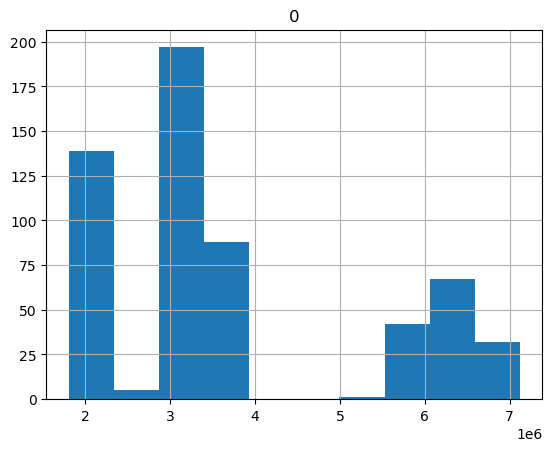

In [17]:
pd.DataFrame(testing_data).hist()

array([[<Axes: title={'center': '0'}>]], dtype=object)

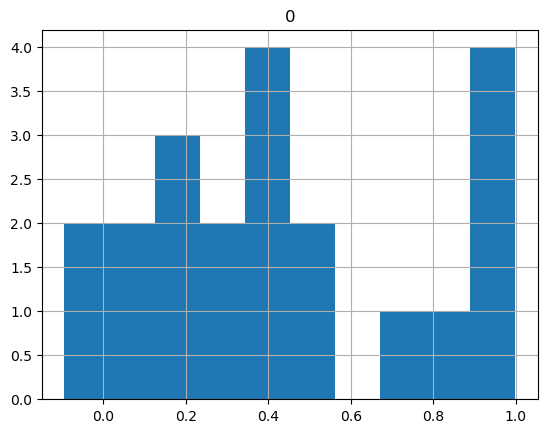

In [18]:
pd.DataFrame(predicted_cash_flow).hist()

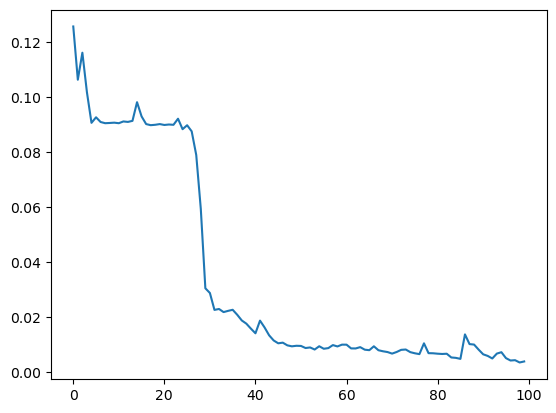

In [19]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')

In [20]:
predicted_cash_flow_train = model.predict(X_train)

10/10 [==============================] - 1s 64ms/step


In [21]:
from sklearn.metrics import mean_squared_error

# calculate root mean squared error
trainScore = mean_squared_error(y_train, predicted_cash_flow_train)
print('Train Score: %.2f MSE' % (trainScore))
testScore = mean_squared_error(y_test, predicted_cash_flow)
print('Test Score: %.2f MSE' % (testScore))

Train Score: 0.00 MSE
Test Score: 0.18 MSE
